In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, log_loss
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, HuberRegressor
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier

# Generating sample regression data
X_reg, y_reg = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# MSE and MAE Example
y_pred_mse = y_train + np.random.normal(scale=5, size=len(y_train))  # Simulating predictions with noise
y_pred_mae = y_train + np.random.normal(scale=10, size=len(y_train))  # Simulating another prediction

mse_value = mean_squared_error(y_train, y_pred_mse)
mae_value = mean_absolute_error(y_train, y_pred_mae)

print(f"Mean Squared Error (MSE): {mse_value:.4f}")
print(f"Mean Absolute Error (MAE): {mae_value:.4f}")

Mean Squared Error (MSE): 25.8738
Mean Absolute Error (MAE): 8.0040


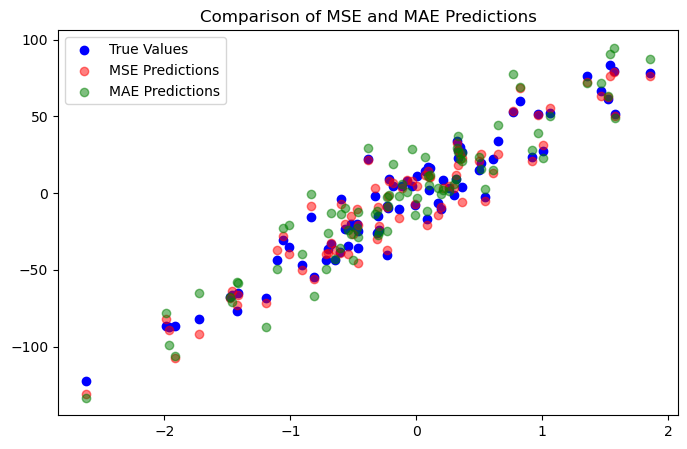

In [44]:
# Visual Comparison of Loss Functions
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, label='True Values', color='blue')
plt.scatter(X_train, y_pred_mse, label='MSE Predictions', color='red', alpha=0.5)
plt.scatter(X_train, y_pred_mae, label='MAE Predictions', color='green', alpha=0.5)
plt.legend()
plt.title("Comparison of MSE and MAE Predictions")
plt.show()

In [46]:
# Huber Loss Example
huber = HuberRegressor(epsilon=1.0)
huber.fit(X_train, y_train)
y_pred_huber = huber.predict(X_train)
huber_loss_value = mean_squared_error(y_train, y_pred_huber)
print(f"Huber Loss: {huber_loss_value:.4f}")

Huber Loss: 164.3102


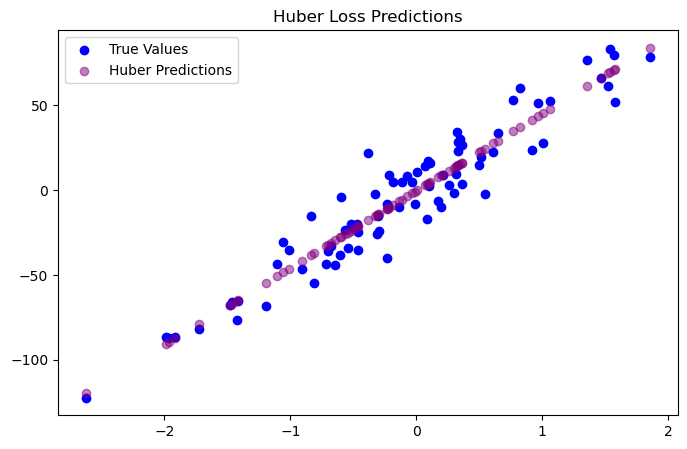

In [48]:
# Plot Huber Loss Predictions
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, label='True Values', color='blue')
plt.scatter(X_train, y_pred_huber, label='Huber Predictions', color='purple', alpha=0.5)
plt.legend()
plt.title("Huber Loss Predictions")
plt.show()

In [78]:
# Generating sample classification data
X_class, y_class = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Log Loss Example
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_loss_value = log_loss(y_train, log_reg.predict_proba(X_train))
print(f"Log Loss: {log_loss_value:.4f}")

# Hinge Loss Example (for SVM)
y_train_hinge = np.where(y_train == 0, -1, 1)  # Convert to {-1, 1} for hinge loss
svm = SVC(kernel='linear')
svm.fit(X_train, y_train_hinge)
hinge_loss_value = np.mean(np.maximum(0, 1 - y_train_hinge * svm.decision_function(X_train)))
print(f"Hinge Loss: {hinge_loss_value:.4f}")

Log Loss: 0.1010
Hinge Loss: 0.0643


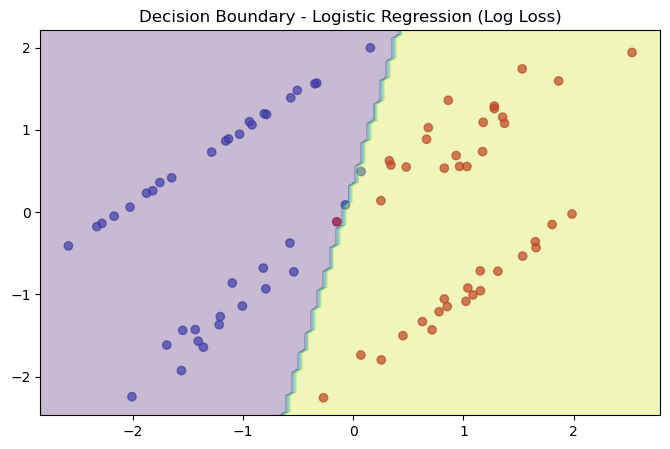

In [80]:
# Decision boundary visualization for Log Loss
plt.figure(figsize=(8, 5))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', alpha=0.7)
xlim, ylim = plt.xlim(), plt.ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.title("Decision Boundary - Logistic Regression (Log Loss)")
plt.show()

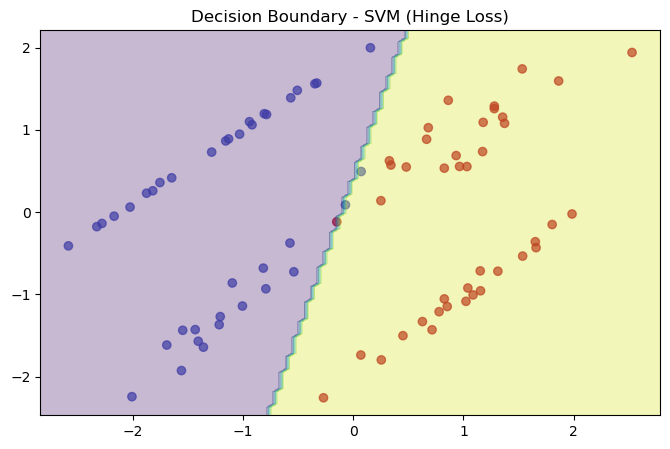

In [82]:
# Decision boundary visualization for Hinge Loss
plt.figure(figsize=(8, 5))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train_hinge, cmap='coolwarm', alpha=0.7)
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.title("Decision Boundary - SVM (Hinge Loss)")
plt.show()